In [42]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")
players_initial <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
players_initial

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


In [43]:
players <- select(players_initial, experience, subscribe, hashedEmail, played_hours, name, gender, age)
players

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [44]:
amateurs <- filter(players, experience == "Amateur")
amateurs

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [45]:
amateurs_selected <- select(amateurs, age, played_hours)
amateurs_selected

age,played_hours
<dbl>,<dbl>
21,0.7
17,0.0
21,0.0
⋮,⋮
17,0.0
17,0.0
17,2.3


In [46]:
#players_mean_age <- map_df(players_selected, mean(age, na.rm == TRUE))
amateurs_mean_values <- summarize(amateurs_selected, mean_age = mean(age, na.rm = TRUE),
                                    mean_played_hours = mean(played_hours))
amateurs_mean_values

mean_age,mean_played_hours
<dbl>,<dbl>
20.25397,6.01746


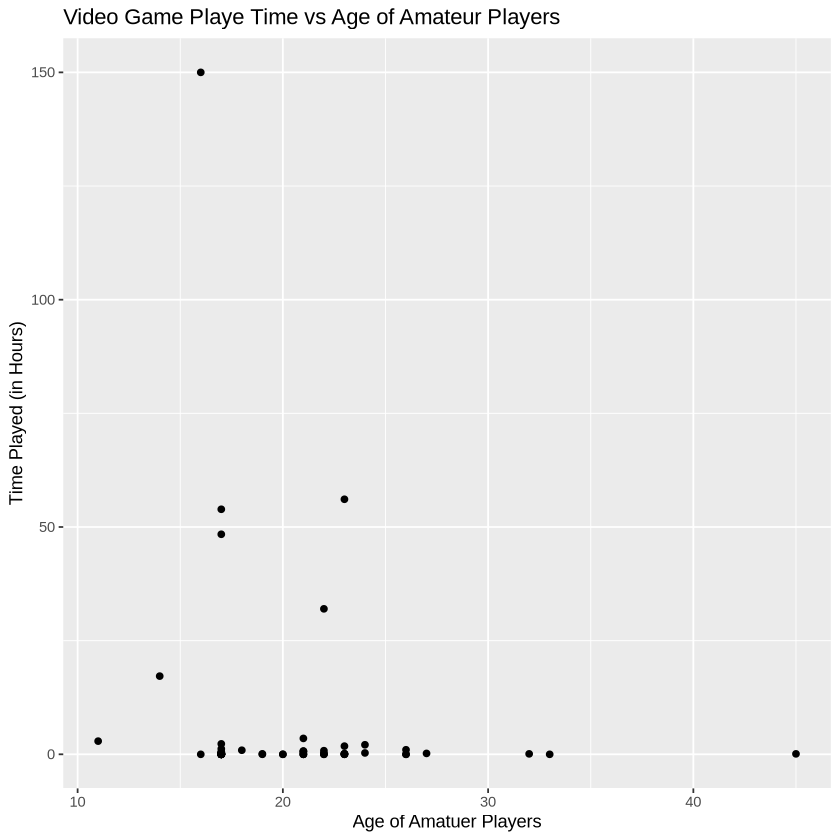

In [48]:
amateurs_visualized <- ggplot(amateurs_selected, aes(x = age, y = played_hours)) +
    geom_point() + labs(x = "Age of Amatuer Players", y = "Time Played (in Hours)", title = "Video Game Playe Time vs Age of Amateur Players")
amateurs_visualized

This visual gives insight to some potential problems. First of all, this data will likely need to be scaled. Second of all, a lot of the players have zero hours. This is does not give the regression model much to work with. We (myself and my group) will have to discuss how we want to deal with this. My suggestion would be to look into a different group of players (perhaps pro). This does make me wonder: how do you get classified as an amateur if you have played 0 hours and therfore provide no data. This is perculular.

1)
- 196 observations
- 7 variables
    - experience: col_character <chr> → the column contains only text
    - subscribe: col_logical  <lgl> → the column can only contain TRUE, FALSE or NA
    - hashedEmail: col_character <chr> → the column contains only text
    - played_hours: col_double <dbl> → the column contains only real numbers
    - name: col_character <chr> → the column contains only text
    - gender: col_character <chr> → the column contains only text
    - age: col_double <dbl> → the column contains only real numbers​​

There are a couple NA values that need to be removed.
Some players played 0 hours, this could be an issue.
The data was provided to us. The PlaiCraft team collects their data by monitoring participants who are playing.


In [58]:
summery_statistics_dbl <- summarize(players, mean_age = mean(age, na.rm = TRUE),
                                    mean_played_hours = mean(played_hours, na.rm = TRUE))
summery_statistics_experience <- group_by(players, experience) |> summarize(n())
summery_statistics_lgl <- group_by(players, subscribe) |> summarize(n())
summery_statistics_gender <- group_by(players, gender) |> summarize(n())

summery_statistics_dbl
summery_statistics_experience 
summery_statistics_lgl 
summery_statistics_gender

mean_age,mean_played_hours
<dbl>,<dbl>
21.28061,5.845918


experience,n()
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,n()
<lgl>,<int>
FALSE,52
TRUE,144


gender,n()
<chr>,<int>
Agender,2
Female,37
Male,124
⋮,⋮
Other,1
Prefer not to say,11
Two-Spirited,6


2)

- We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. Specific: Can we predict the total number of hours that an amateaur has played if we know their age? 
    - Response variable: played_hours
    - Explanatory Variable: Age
    - Sample: filter for only amateurs
- The short version of our plan is that we will filter the data for Amatuer players and then select the played_hours and Age columns. We will then make a scatterplot, choose a K value and train a knn regression model. We may have to scale and center our values before choosing K and training the model. If there is a trend, this regression model should be able to make a prediction about the total hours that an amateaur player has played based on their age. 
- This question can help the research group determine if there is a certain age range of amateurs that play the most. This relates to the broad question by investigating what “kinds” (amateaur player of what age) are likely to produce a large amount of data (large number of hours played)


4)

KNN Regression!!
- We aim to predict a quantitative value (hours played), not a class.
    - This method will take the mean y value of the K nearest neighbors and assign it to the corresponding x value. This will happen for many values to make a prediction curve. We will choose our value of K from cross validation.
This method is appropriate because KNN regression allows you to predict a numerical y value from a numeric x value. We want to predict a y value (play time) from an x value (age)
    - To apply this method, we assume that there is a relationship between play time and age in amateurs. We are assuming that the data is not going to be linear, however if it is, we will reevaluate. 
- Knn regression is not very reliable outside the range of values in the training set, which is a limitation, along with the overall trends of a knn regression sometimes being difficult to interpret.
- We are going to do cross-validation and split the training data into folds in order to choose the K value that produces the lowest RMSPE value. We have not yet decided how many folds we want to do.
